In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import hopsworks
import pandas as pd

In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/193684
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
wine_df = pd.read_csv("datasets/wine+quality/winequality-red.csv", sep=";")
wine_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
print(wine_df.isnull().sum() + wine_df.isna().sum())
print(wine_df['quality'].value_counts())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


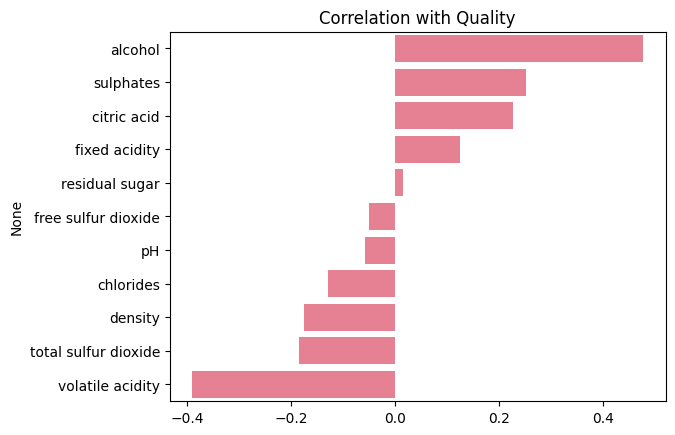

In [8]:
# plot the correlation between quality and the different categories
d_corr = wine_df.corr()['quality'].sort_values(ascending=False).drop('quality')

sns.barplot(y=d_corr.index, x=d_corr.values)
plt.title('Correlation with Quality')
plt.show()


In [9]:
# sanitize the data column names (no spaces and lower case)
wine_df.columns = wine_df.columns.str.replace(' ', '_').str.lower()
wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol'], 
    description="Wine quality dataset")
wine_fg.insert(wine_df)

2023-11-08 19:06:06,611 INFO: 	11 expectation(s) included in expectation_suite.
Validation succeeded.
Validation Report saved successfully, explore a summary at https://c.app.hopsworks.ai:443/p/193684/fs/193603/fg/202082


Uploading Dataframe: 0.00% |          | Rows 0/1599 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/193684/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x29291bca0>,
 {
   "evaluation_parameters": {},
   "meta": {
     "great_expectations_version": "0.14.13",
     "expectation_suite_name": "wine_dimensions",
     "run_id": {
       "run_time": "2023-11-08T18:06:06.610788+00:00",
       "run_name": null
     },
     "batch_kwargs": {
       "ge_batch_id": "7cd174ea-7e61-11ee-902b-62d973677e3e"
     },
     "batch_markers": {},
     "batch_parameters": {},
     "validation_time": "20231108T180606.610616Z",
     "expectation_suite_meta": {
       "great_expectations_version": "0.14.13"
     }
   },
   "success": true,
   "results": [
     {
       "expectation_config": {
         "meta": {
           "expectationId": 146473
         },
         "expectation_type": "expect_column_values_to_be_between",
         "kwargs": {
           "column": "total_sulfur_dioxide",
           "min_value": 5,
           "max_value": 300
         }
       },
       "meta": {
         "ingestionResult": "INGESTED",
         "validati

In [11]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [12]:
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")

expect(suite, "fixed_acidity", 4, 16)
expect(suite, "volatile_acidity", 0, 1.6)
expect(suite, "citric_acid", 0, 1)
expect(suite, "residual_sugar", 0, 16)
expect(suite, "chlorides", 0, 0.7)
expect(suite, "free_sulfur_dioxide", 1, 75)
expect(suite, "total_sulfur_dioxide", 5, 300)
expect(suite, "density", 0.99, 1.01)
expect(suite, "ph", 2.7, 4.1)
expect(suite, "sulphates", 0.3, 2)
expect(suite, "alcohol", 8, 15)
wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/193684/fs/193603/fg/202082
